In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.formula.api import ols
import scipy.stats as stats

In [2]:
df_spend = pd.read_csv('000_Card_Spending.csv', encoding='utf-8')
df_card = pd.read_csv('000_Card_Data.csv', encoding='utf-8')
df_tel = pd.read_csv('000_Telemarketing_Data.csv', encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: '000_Card_Spending.csv'

In [65]:
display(df_tel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연령        41188 non-null  int64  
 1   직업군       41188 non-null  object 
 2   결혼여부      41188 non-null  object 
 3   학력        41188 non-null  object 
 4   신용카드소지여부  41188 non-null  object 
 5   주택대출여부    41188 non-null  object 
 6   개인대출여부    41188 non-null  object 
 7   contact   41188 non-null  object 
 8   통화시간      41188 non-null  int64  
 9   연락시도횟수    41188 non-null  int64  
 10  p_days    1515 non-null   float64
 11  과거통화횟수    41188 non-null  int64  
 12  계약여부      41188 non-null  object 
 13  연락일자      41188 non-null  object 
 14  카드종류      41188 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 4.7+ MB


None

In [66]:
df_tel.isnull().sum()

연령              0
직업군             0
결혼여부            0
학력              0
신용카드소지여부        0
주택대출여부          0
개인대출여부          0
contact         0
통화시간            0
연락시도횟수          0
p_days      39673
과거통화횟수          0
계약여부            0
연락일자            0
카드종류            0
dtype: int64

In [67]:
df_tel.head()

,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,연락일자,카드종류
0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,NaN,0,no,2018-01-03,87
1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,NaN,0,no,2018-01-03,88
2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,NaN,0,no,2018-01-03,89
3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,NaN,0,no,2018-01-03,90
4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,NaN,0,no,2018-01-03,91


In [68]:
df_tel_num = df_tel.select_dtypes(exclude='object')
df_tel_obj = df_tel.select_dtypes('object')

num = df_tel_num.columns.tolist()
obj = df_tel_obj.columns.tolist()

In [69]:
df_tel_num.describe()

,연령,통화시간,연락시도횟수,p_days,과거통화횟수,카드종류
count,41188.00000,41188.000000,41188.000000,1515.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,6.014521,0.172963,156.975721
std,10.42125,259.279249,2.770014,3.824906,0.494901,40.713492
min,17.00000,0.000000,1.000000,0.000000,0.000000,87.000000
25%,32.00000,102.000000,1.000000,3.000000,0.000000,122.000000
50%,38.00000,180.000000,2.000000,6.000000,0.000000,157.000000
75%,47.00000,319.000000,3.000000,7.000000,0.000000,192.000000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,227.000000


array([[<AxesSubplot:title={'center':'연령'}>,
        <AxesSubplot:title={'center':'통화시간'}>],
       [<AxesSubplot:title={'center':'연락시도횟수'}>,
        <AxesSubplot:title={'center':'p_days'}>],
       [<AxesSubplot:title={'center':'과거통화횟수'}>,
        <AxesSubplot:title={'center':'카드종류'}>]], dtype=object)

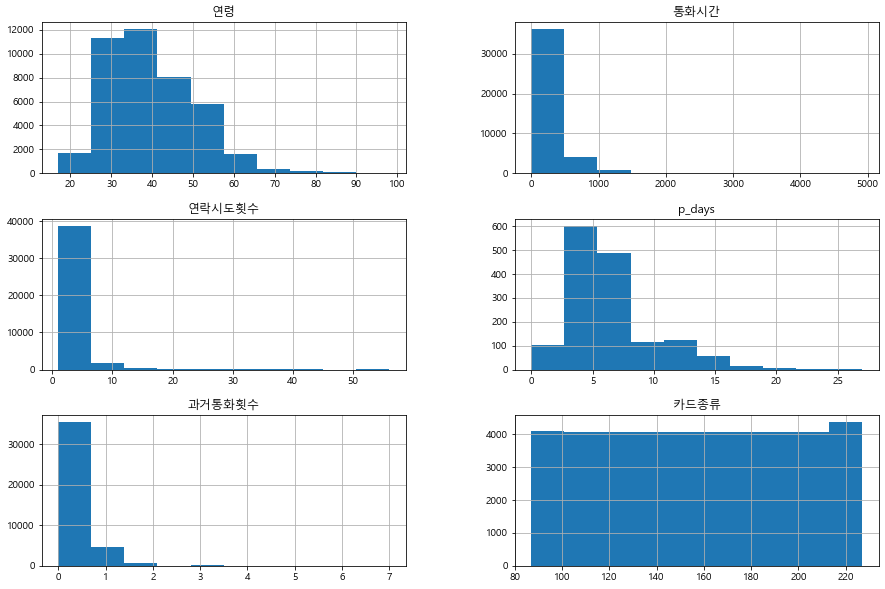

In [70]:
df_tel_num.hist(figsize=(15,10))

(0.0, 1000.0)

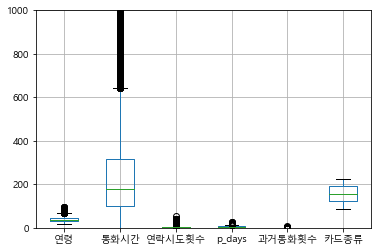

In [71]:
df_tel.boxplot()
plt.ylim([0, 1000])

(-20.0, 150.0)

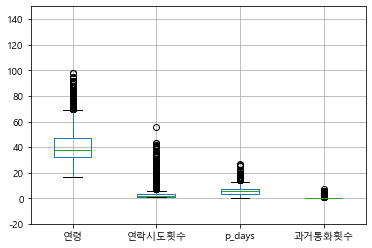

In [72]:
df_tel[['연령', '연락시도횟수', 'p_days', '과거통화횟수']].boxplot()
plt.ylim([-20,150])

In [58]:
def c_plot(data, x, hue=None):
    plt.figure(figsize=(50,50))
    for i in range(len(x)):
        plt.subplot(3,3,i+1)
        sns.countplot(x[i], data=data, hue=hue)

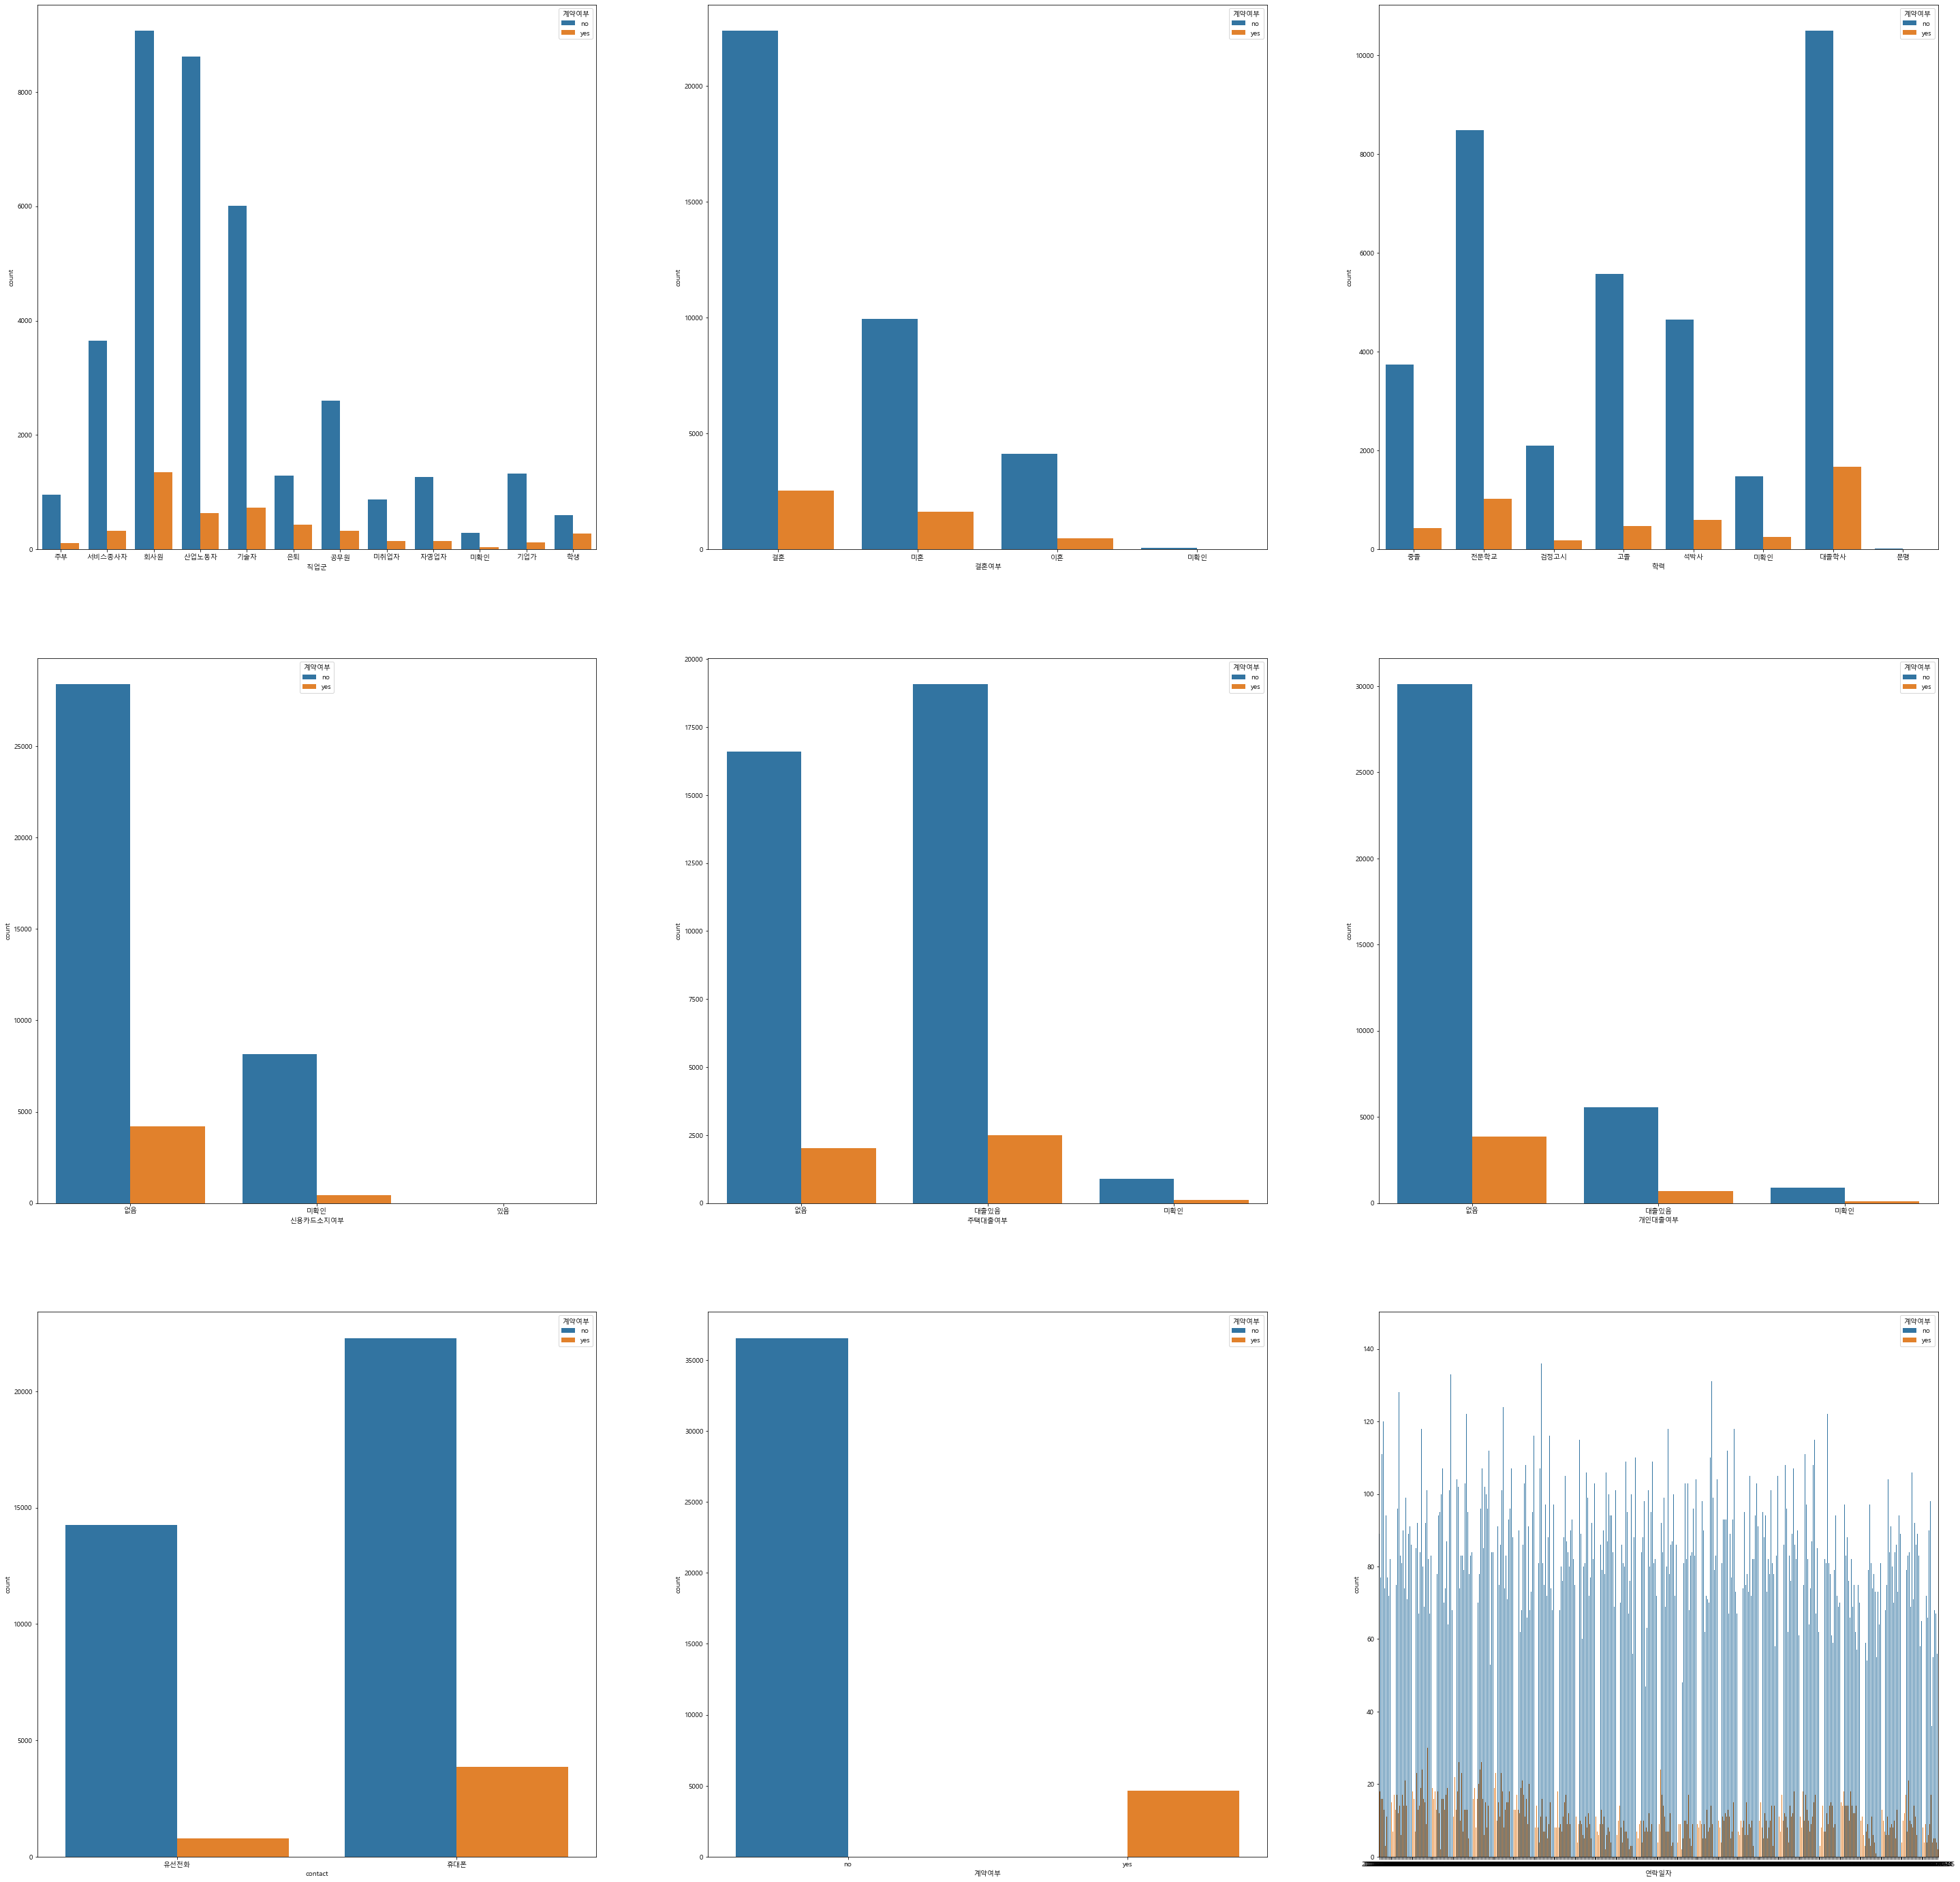

In [59]:
c_plot(df_tel_obj, obj, '계약여부')

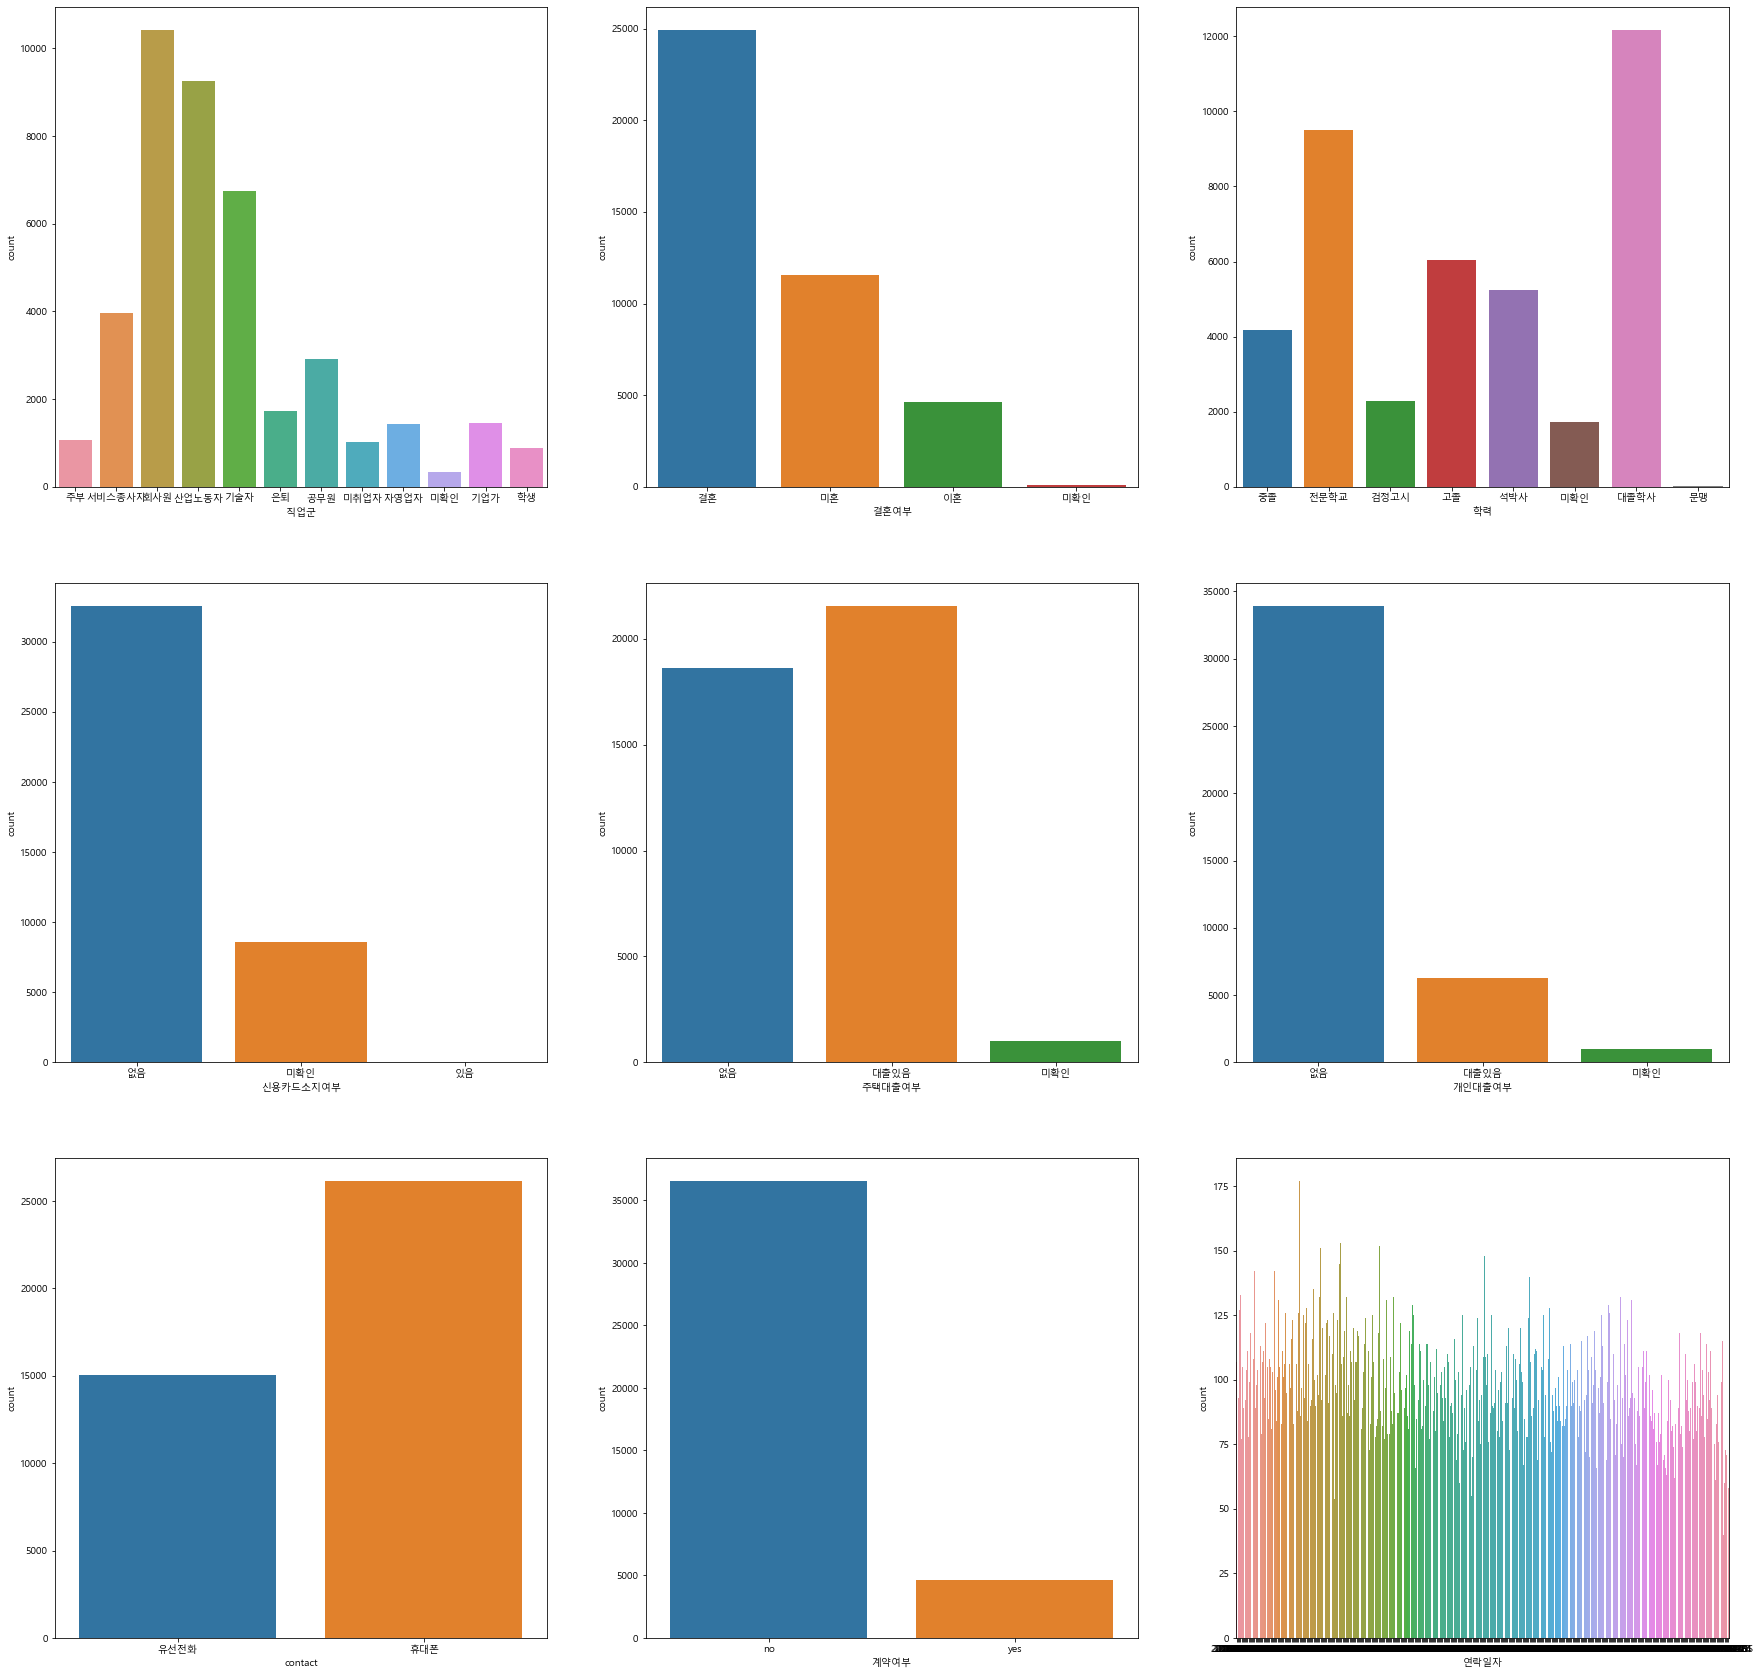

In [51]:
c_plot(df_tel_obj, obj)

p_days 결측치 대체  
p_days가 NaN인 경우, 이전에 연락한 적이 없다고 가정

In [73]:
df_tel['p_days'].fillna('안함', inplace=True)
df_tel['재연락'] = np.where(df_tel['p_days'] == '안함', 0, 1)

연령          39673
직업군         39673
결혼여부        39673
학력          39673
신용카드소지여부    39673
주택대출여부      39673
개인대출여부      39673
contact     39673
통화시간        39673
연락시도횟수      39673
p_days      39673
과거통화횟수      39673
계약여부        39673
연락일자        39673
카드종류        39673
재연락         39673
dtype: int64

<AxesSubplot:xlabel='재연락', ylabel='count'>

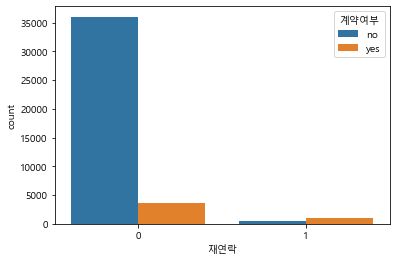

In [74]:
sns.countplot('재연락', data=df_tel, hue='계약여부')

In [80]:
# qualitative_colors = sns.color_palette("Set3", 10)
# sns.palplot(qualitative_colors)
p_recall = pd.pivot_table(data=df_tel, index=['재연락','계약여부'], values=['연락시도횟수'], aggfunc='count').reset_index()
display(p_recall)

,재연락,계약여부,연락시도횟수
0,0,no,36000
1,0,yes,3673
2,1,no,548
3,1,yes,967


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

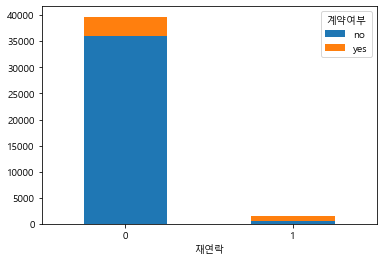

In [82]:
recall_g = df_tel.groupby(['재연락', '계약여부'])['계약여부'].count().unstack('계약여부').fillna(0)
recall_g = recall_g.sort_values(by='no', ascending=False)
recall_g.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)

In [85]:
display(tel_day_g)
chi, pval, dof, expected = stats.chi2_contingency(observed = tel_day_g)
print('chi-square test')
print('chisq : {0:.3f}'.format(chi))
print('p : {0:3f}'.format(pval))
display(pd.DataFrame(expected.round(0)))

계약여부,no,yes
재연락,,
0,36000,3673
1,548,967


chi-square test
chisq : 4341.725
p : 0.000000


,0,1
0,35204.0,4469.0
1,1344.0,171.0


In [17]:
df_card2 = df_card.copy()
df_card2.rename(columns={'Card_ID' : '카드종류'}, inplace=True)

In [21]:
df_card_tel = pd.merge(df_tel, df_card2, on = '카드종류')